In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import struct
import requests
from datetime import datetime, timedelta
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from scipy.fftpack import fft
from scipy.signal import get_window, spectrogram
import pickle
import re
from collections import Counter

# only 111

In [2]:
#ZCU111 SBL list >5%
zcu111_list=np.array([
 'LERFUJI_2024-10-13_00-10-19.npz',
 'LERFUJI_2024-10-13_09-25-06.npz',
 'LERFUJI_2024-10-13_12-47-29.npz',
 'LERFUJI_2024-10-13_14-34-59.npz',
 'LERFUJI_2024-10-14_01-44-58.npz',
 'LERFUJI_2024-10-14_02-20-24.npz',
 'LERFUJI_2024-10-14_15-02-49.npz',
 'LERFUJI_2024-10-15_01-18-06.npz',
 'LERFUJI_2024-10-15_05-30-08.npz',
 'LERFUJI_2024-10-15_08-37-16.npz',
 'LERFUJI_2024-10-15_11-30-38.npz',
 'LERFUJI_2024-10-15_20-22-59.npz',
 'LERFUJI_2024-10-15_20-56-49.npz',
 'LERFUJI_2024-10-15_22-52-26.npz',
 'LERFUJI_2024-10-15_23-43-13.npz',
 'LERFUJI_2024-10-16_01-29-20.npz',
 'LERFUJI_2024-10-16_02-27-58.npz',
 'LERFUJI_2024-10-16_04-52-14.npz',
 'LERFUJI_2024-10-17_09-02-58.npz',
 'LERFUJI_2024-10-17_09-32-06.npz',
 'LERFUJI_2024-10-18_02-29-34.npz',
 'LERFUJI_2024-10-18_03-07-24.npz',
 'LERFUJI_2024-10-18_03-27-52.npz',
 'LERFUJI_2024-10-18_09-17-07.npz',
 'LERFUJI_2024-10-18_15-51-23.npz',
 'LERFUJI_2024-10-18_19-22-55.npz',
 'LERFUJI_2024-10-18_23-01-11.npz',
 'LERFUJI_2024-10-19_00-02-36.npz',
 'LERFUJI_2024-10-19_02-46-12.npz',
 'LERFUJI_2024-10-19_05-21-33.npz',
 'LERFUJI_2024-10-19_06-12-19.npz',
 'LERFUJI_2024-10-19_06-35-20.npz',
 'LERFUJI_2024-10-19_09-05-05.npz',
 'LERFUJI_2024-10-19_10-19-12.npz',
 'LERFUJI_2024-10-19_18-05-55.npz',
 'LERFUJI_2024-10-19_21-33-36.npz',
 'LERFUJI_2024-10-20_10-14-52.npz',
 'LERFUJI_2024-10-20_11-00-25.npz',
 'LERFUJI_2024-10-20_13-51-29.npz',
 'LERFUJI_2024-10-20_20-21-44.npz',
 'LERFUJI_2024-10-21_00-19-58.npz',
 'LERFUJI_2024-10-21_00-35-06.npz',
 'LERFUJI_2024-10-21_07-54-25.npz',
 'LERFUJI_2024-10-21_08-08-53.npz',
 'LERFUJI_2024-10-21_08-59-35.npz',
 'LERFUJI_2024-10-22_00-58-30.npz',
 'LERFUJI_2024-10-22_02-30-09.npz',
 'LERFUJI_2024-10-22_03-20-25.npz',
 'LERFUJI_2024-10-22_09-20-05.npz',
 'LERFUJI_2024-10-22_09-37-16.npz',
 'LERFUJI_2024-10-22_09-56-32.npz',
 'LERFUJI_2024-10-23_03-16-57.npz',
 'LERFUJI_2024-10-26_16-37-24.npz',
 'LERFUJI_2024-10-26_20-37-51.npz',
 'LERFUJI_2024-10-27_02-02-02.npz',
 'LERFUJI_2024-10-27_05-01-04.npz',
 'LERFUJI_2024-10-27_05-25-07.npz',
 'LERFUJI_2024-10-27_06-17-55.npz',
 'LERFUJI_2024-10-27_06-55-20.npz',
 'LERFUJI_2024-10-27_13-43-55.npz',
 'LERFUJI_2024-10-27_15-10-13.npz',
 'LERFUJI_2024-10-27_15-32-04.npz',
 'LERFUJI_2024-10-27_21-28-33.npz',
 'LERFUJI_2024-10-27_23-44-12.npz',
 'LERFUJI_2024-10-28_02-06-05.npz',
 'LERFUJI_2024-10-28_02-30-07.npz',
 'LERFUJI_2024-10-28_02-55-30.npz',
 'LERFUJI_2024-10-28_19-13-27.npz',
 'LERFUJI_2024-10-29_01-41-14.npz',
 'LERFUJI_2024-10-29_03-00-30.npz',
 'LERFUJI_2024-10-29_15-19-37.npz',
 'LERFUJI_2024-10-29_17-51-52.npz',
 'LERFUJI_2024-10-29_19-49-12.npz',
 'LERFUJI_2024-10-29_22-59-36.npz',
 'LERFUJI_2024-10-29_23-49-03.npz',
 'LERFUJI_2024-10-30_02-02-03.npz',
 'LERFUJI_2024-10-30_02-30-10.npz',
 'LERFUJI_2024-11-01_03-49-06.npz',
 'LERFUJI_2024-11-01_04-31-16.npz',
 'LERFUJI_2024-11-02_08-54-09.npz',
 'LERFUJI_2024-11-02_12-30-45.npz',
 'LERFUJI_2024-11-02_13-51-41.npz',
 'LERFUJI_2024-11-02_16-48-53.npz',
 'LERFUJI_2024-11-02_19-05-51.npz',
 #'LERFUJI_2024-11-03_01-33-25.npz',
 'LERFUJI_2024-11-03_03-33-06.npz',
 'LERFUJI_2024-11-03_03-58-26.npz',
 'LERFUJI_2024-11-03_11-46-08.npz',
 'LERFUJI_2024-11-03_17-35-45.npz',
 'LERFUJI_2024-11-03_17-56-46.npz',
 'LERFUJI_2024-11-03_20-11-52.npz',
 'LERFUJI_2024-11-03_23-57-50.npz',
 'LERFUJI_2024-11-04_04-14-19.npz',
 #'LERFUJI_2024-11-04_09-57-37.npz',
 'LERFUJI_2024-11-04_14-40-20.npz',
 'LERFUJI_2024-11-04_21-12-50.npz',
 'LERFUJI_2024-11-04_22-05-43.npz',
 'LERFUJI_2024-11-05_04-53-14.npz',
 'LERFUJI_2024-11-05_10-06-20.npz',
 'LERFUJI_2024-11-05_10-37-18.npz',
 'LERFUJI_2024-11-05_11-56-33.npz',
 'LERFUJI_2024-11-05_16-29-27.npz',
 'LERFUJI_2024-11-05_20-32-53.npz',
 'LERFUJI_2024-11-06_04-06-18.npz',
 'LERFUJI_2024-11-06_05-48-50.npz',
 'LERFUJI_2024-11-07_16-25-57.npz',
 'LERFUJI_2024-11-08_08-50-27.npz',
 'LERFUJI_2024-11-08_16-43-14.npz',
 'LERFUJI_2024-11-08_16-58-08.npz',
 'LERFUJI_2024-11-09_08-59-06.npz',
 'LERFUJI_2024-11-09_23-06-12.npz',
 'LERFUJI_2024-11-10_03-27-52.npz',
 'LERFUJI_2024-11-11_05-25-24.npz',
 'LERFUJI_2024-11-11_10-54-27.npz',
 'LERFUJI_2024-11-11_11-42-48.npz',
 #'LERFUJI_2024-11-11_12-41-57.npz',
 'LERFUJI_2024-11-12_19-38-00.npz',
 'LERFUJI_2024-11-13_23-16-26.npz',
 'LERFUJI_2024-11-15_08-22-08.npz',
 'LERFUJI_2024-11-15_20-34-41.npz',
 'LERFUJI_2024-11-16_01-15-10.npz',
 'LERFUJI_2024-11-16_03-39-21.npz',
 'LERFUJI_2024-11-18_03-28-51.npz',
 #'LERFUJI_2024-11-22_23-42-46.npz'
])

pressure=[
'D10_L02/03',
'D10_L02/03',
'D04_L07',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D04_L06',
'D10_L02/03',
'D10_L02/03',
'D04_L07',
'D10_L02/03',
'D10_L06',
'D10_L02/03',
'nan',
'D10_L02/03',
'D10_L02/03',
'D04_L05',
'nan',
'nan',
'D04_L04',
'D10_L02/03',
'D10_L07',
'D10_L07',
'D10_L02/03',
'D10_L02/03',
'D04_L06',
'D10_L02/03',
'D04_L04',
'D10_L02/03',
'nan',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L05',
'D10_L08',
'D10_L08',
'D10_L08',
'D10_L05',
'D10_L05',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L08',
'D10_L08',
'D10_L02/03',
'D10_L05',
'D05_L23',
'D10_L02/03',
'D10_L05',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'nan',
'D04_L07',
'D10_L02/03',
'D10_L05',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L05',
'D10_L02/03',
'D10_L07',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'nan',
'D10_L02/03',
#'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'nan',
'nan',
'nan',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
#'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'nan',
'D10_L06',
'nan',
'nan',
'nan',
'nan',
'D10_L06',
'nan',
'D02_L25',
'nan',
#'D10_L07',
'D11_L19',
'D08_L12',
'nan',
'D06_L12',
'D04_L02',
'D06_L12',
'D10_L02/03',
#'D10_L08'
]

optics=np.array([
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
#1,
1,
1,
1,
1,
1,
1,
1,
1,
#1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
#1,
1,
1,
1,
1,
1,
1,
1,
#1
])

In [3]:
len(optics)

120

In [4]:
np.unique(np.array(pressure))

array(['D02_L25', 'D04_L02', 'D04_L04', 'D04_L05', 'D04_L06', 'D04_L07',
       'D05_L23', 'D06_L12', 'D08_L12', 'D10_L02/03', 'D10_L05',
       'D10_L06', 'D10_L07', 'D10_L08', 'D11_L19', 'nan'], dtype='<U10')

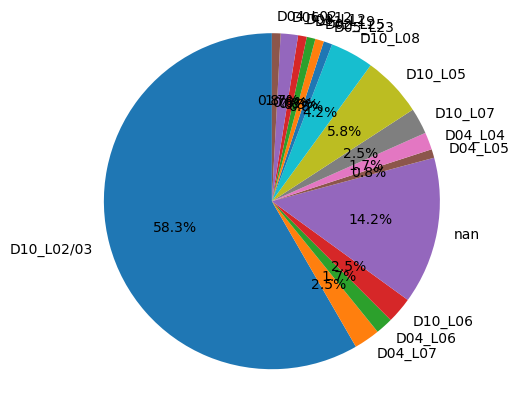

In [5]:
counter = Counter(pressure)

# 円グラフを作成
labels = counter.keys()
sizes = counter.values()

plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
plt.axis("equal")  # 円を正確に描画
plt.show()

In [60]:
def make_plot(filename1,pressure):
    npz_kw = np.load('/mnt/SBOR/2024c_RFSoC/ZCU111/Abort/'+filename1,allow_pickle=True)
    X_sum=npz_kw['X_sum']
    X_delta=npz_kw['X_delta']
    Y_sum=npz_kw['Y_sum']
    Y_delta=npz_kw['Y_delta']
    print(len(X_sum))

    
    if filename1=="LERFUJI_2024-10-16_08-57-48.npz":
        return
    if filename1=="LERFUJI_2024-10-15_19-08-53.npz":
        return
    if filename1=="LERFUJI_2024-10-16_01-58-36.npz":
        Y_sum=np.zeros(len(Y_delta))

    timesteps2=np.arange(len(X_sum))/509
    timesteps2=timesteps2-timesteps2[-1]
    
    ##################    



    df = pd.DataFrame({'x':timesteps2,'X_sum':X_sum,'X_delta':X_delta,'Y_sum':Y_sum,'Y_delta':Y_delta})
    threshold=2000
    # 条件に従って 'result' を計算
    df['result_x'] = np.where(df['X_sum'] > threshold, df['X_delta'] / df['X_sum']*(16.58/5), 0)
    # 'result' から オフセットの値を引き算
    df['result_diff_x'] = df['result_x'] 
    offset = df['result_x'].iloc[0:5120].reset_index(drop=True)  # 1行目から5120行目の値
    
    for i in range(1, len(df) // 5120):
        start = i * 5120
        end = start + 5120-1
        df.loc[start:end, 'result_diff_x'] -= offset.values
    # 絶対値が 0.4 を超える場合は 0 に設定
    df['result_diff_x'] = np.where(abs(df['result_diff_x']) > 1.5, 0, df['result_diff_x'])
    # 'X_sum' が 2000 より小さい行の 'result' を NaN にする
    df['result_diff_x'] = np.where(df['X_sum'] <= threshold, np.nan, df['result_diff_x'])
    moving_avg = df['result_diff_x'].dropna().rolling(window=500).mean()
    moving_std = df['result_diff_x'].dropna().rolling(window=500).std()
    # 元のDataFrameに移動平均をマージ
    df['x_moving_avg'] = moving_avg.reindex(df.index)
    df['x_moving_std'] = moving_std.reindex(df.index)
    df['result_diff_x'] = np.where(df['X_sum'] <= threshold, np.nan, df['result_diff_x'])
    df['result_interp_x']=df['result_diff_x']#.interpolate(method='spline',order=1)

    df['result_y'] = np.where(df['X_sum'] > threshold, df['Y_delta'] / df['Y_sum']*(16.58/5), 0)
    # 'result' から 51200 行上の値を引き算
    df['result_diff_y'] = df['result_y']
    offset = df['result_y'].iloc[0:5120].reset_index(drop=True)  # 1行目から5120行目の値
    for i in range(1, len(df) // 5120):
        start = i * 5120
        end = start + 5120-1
        df.loc[start:end, 'result_diff_y'] -= offset.values
    # 絶対値が 0.4 を超える場合は 0 に設定
    df['result_diff_y'] = np.where(abs(df['result_diff_y']) > 1.5, 0, df['result_diff_y'])
    # 'X_sum' が 2000 より小さい行の 'result' を NaN にする
    df['result_diff_y'] = np.where(df['X_sum'] <= threshold, np.nan, df['result_diff_y'])
    moving_avg = df['result_diff_y'].dropna().rolling(window=500).mean()
    moving_std = df['result_diff_y'].dropna().rolling(window=500).std()
    # 元のDataFrameに移動平均をマージ
    df['y_moving_avg'] = moving_avg.reindex(df.index)
    df['y_moving_std'] = moving_std.reindex(df.index)
    df['result_diff_y'] = np.where(df['X_sum'] <= threshold, np.nan, df['result_diff_y'])
    df['result_interp_y']=df['result_diff_y']#.interpolate(method='spline',order=1)

    # 条件に従って 'result' を計算
    df['result_charge'] = np.where(df['X_sum'] > threshold,  df['X_sum']+df['Y_sum'], np.nan)
    # 'result' から 51200 行上の値を引き算
    df['result_diff_charge'] = df['result_charge'] / df['result_charge'].shift(51200)

    condition = df['X_sum'] <= 2000
    # 連続する2000以下の行数をカウント
    df['group'] = (condition != condition.shift()).cumsum()
    df['count'] = df.groupby('group')['X_sum'].transform('size')
    # 2000以下の連続が300行以上になる部分を削除
    index_to_drop = df[(condition) & (df['count'] >= 300)].index[0] if len(df[(condition) & (df['count'] >= 300)]) > 0 else None
    # 該当部分を削除
    if index_to_drop is not None:
        df = df[:index_to_drop]  # 連続部分の開始行以降を削除



    step_size = 40
    turn=len(df)//5120-10
    if turn<10:
        return np.nan
    tbtdata_111_x=df['result_interp_x'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_x_ma=df['x_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_x_std=df['x_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_y=df['result_interp_y'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_y_ma=df['y_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_y_std=df['y_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    charge_111=df['result_diff_charge'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    
    #tbtdata_111=tbtdata_111.reshape(turn,5120)
    turn111=turn

    iii=80
    a=tbtdata_111_x_ma[-iii*5120:]
    b=np.full(iii*5120,np.nanstd(tbtdata_111_x))*0.6
    index_111 = next(
            (i for i, (a_val, b_val) in enumerate(zip(a, b))
             if not np.isnan(a_val) and not np.isnan(b_val) and abs(a_val) > b_val),
            iii*5120
        )
    index_111=index_111-iii*5120
    print(index_111)
    a=tbtdata_111_y_ma[-iii*5120:]
    b=np.full(iii*5120,np.nanstd(tbtdata_111_y))*0.6
    index_111_y = next(
            (i for i, (a_val, b_val) in enumerate(zip(a, b))
             if not np.isnan(a_val) and not np.isnan(b_val) and abs(a_val) > b_val),
            iii*5120
        )
    index_111_y=index_111_y-iii*5120
    print(index_111_y)

    fig, (ax1,ax2,ax3) = plt.subplots(3, 1, sharex=True,figsize=(16,6))
    timeaxis=np.arange(len(tbtdata_111_x))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax1.set_title(f'{filename1[8:-4]} / Pressure burst : {pressure}')
    ax1.scatter(timeaxis,tbtdata_111_x,c='red',s=1)
    ax1.plot(timeaxis,tbtdata_111_x_ma,'o-',c='green',markersize=0.02)
    #ax1.plot(timeaxis,tbtdata_111_x_std,'o-',c='green',markersize=1)
    time_111=timeaxis[index_111]
    ax1.vlines(time_111,-0.6,0.6)
    ax1.grid()
    ax1.set_ylim(-0.6,0.6)
    ax1.set_ylabel('Fuji X pos (mm)')
    timeaxis=np.arange(len(tbtdata_111_y))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax2.scatter(timeaxis,tbtdata_111_y,c='red',s=1)
    ax2.plot(timeaxis,tbtdata_111_y_ma,'o-',c='green',markersize=0.02)
    #ax2.plot(timeaxis,tbtdata_111_y_std,'o-',c='green',markersize=1)
    time_111_y=timeaxis[index_111_y]
    ax2.vlines(time_111_y,-0.6,0.6)
    ax2.grid()
    ax2.set_ylim(-0.6,0.6)
    #ax2.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax2.set_ylabel('Fuji Y pos (mm)')
    
    timeaxis=np.arange(len(charge_111))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax3.scatter(timeaxis,charge_111,c='blue',s=1)
    index_charge_111 = next((i for i, x in enumerate(charge_111[-5120*10:]) if x < 0.95), None)
    if index_charge_111 is None:
        print('not SBL')
        plt.close()
        return
    index_charge_111+=5120*10
    charge_time_111=timeaxis[len(charge_111)-5120*20+index_charge_111]
    ax3.vlines(charge_time_111,0,1.2)
    ax3.grid()
    ax3.set_ylim(0,1.2)
    #ax3.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax3.set_ylabel('Fuji charge (a.u.)')
    
    plt.xlim(-80,0)
    plt.xlabel('Turn')
    plt.savefig(f'masterthesis/{filename1[8:-4]}_111.png',dpi=100)
    plt.close()
    print(time_111)
    print(time_111_y)

    fig, (ax1,ax2,ax3) = plt.subplots(3, 1, sharex=True,figsize=(16,6))
    timeaxis=np.arange(len(tbtdata_111_x))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax1.set_title(f'{filename1[8:-4]} / Pressure burst : {pressure}')
    ax1.scatter(timeaxis,tbtdata_111_x,c='red',s=1)
    ax1.plot(timeaxis,tbtdata_111_x_ma,'o-',c='green',markersize=0.02)
    #ax1.plot(timeaxis,tbtdata_111_x_std,'o-',c='green',markersize=1)
    time_111=timeaxis[index_111]
    ax1.vlines(time_111,-0.6,0.6)
    ax1.grid()
    ax1.set_ylim(-0.6,0.6)
    ax1.set_ylabel('Fuji X pos (mm)')
    timeaxis=np.arange(len(tbtdata_111_y))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax2.scatter(timeaxis,tbtdata_111_y,c='red',s=1)
    ax2.plot(timeaxis,tbtdata_111_y_ma,'o-',c='green',markersize=0.02)
    #ax2.plot(timeaxis,tbtdata_111_y_std,'o-',c='green',markersize=1)
    time_111_y=timeaxis[index_111_y]
    ax2.vlines(time_111_y,-0.6,0.6)
    ax2.grid()
    ax2.set_ylim(-0.6,0.6)
    #ax2.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax2.set_ylabel('Fuji Y pos (mm)')
    
    timeaxis=np.arange(len(charge_111))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax3.scatter(timeaxis,charge_111,c='blue',s=1)
    index_charge_111 = next((i for i, x in enumerate(charge_111[-5120*10:]) if x < 0.95), None)
    if index_charge_111 is None:
        print('not SBL')
        plt.close()
        return
    index_charge_111+=5120*10
    charge_time_111=timeaxis[len(charge_111)-5120*20+index_charge_111]
    ax3.vlines(charge_time_111,0,1.2)
    ax3.grid()
    ax3.set_ylim(0,1.2)
    ax3.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax3.set_ylabel('Fuji charge (a.u.)')
    
    plt.xlim(-15,0)
    plt.xlabel('Turn')
    plt.savefig(f'masterthesis/{filename1[8:-4]}_111_2.png',dpi=100)
    plt.close()

    plt.rcParams["font.size"] = 12
    fig, (ax1,ax2) = plt.subplots(2, 1, sharex=True,figsize=(16,6))
    timeaxis=np.arange(len(tbtdata_111_x))/5120
    timeaxis=timeaxis-timeaxis[-1]
    #ax1.set_title(f'{filename1[8:-4]}')

    ax1.scatter(timeaxis,tbtdata_111_x,c='red',s=1,alpha=0.3)
    ax1.plot(timeaxis,tbtdata_111_x_ma,'o-',c='green',markersize=0.2,label='Moving average')
    ax1.axhline(y=np.nanstd(tbtdata_111_x)*0.6,c='blue',label='Threshold')
    ax1.axhline(y=-1*np.nanstd(tbtdata_111_x)*0.6,c='blue')
    ax1.vlines(time_111,-0.6,0.6,color='tab:orange')
    ax1.grid()
    ax1.legend(fontsize=10,loc='upper left')
    ax1.set_ylim(-0.2,0.2)
    ax1.set_ylabel('X pos (mm)')
    timeaxis=np.arange(len(tbtdata_111_y))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax2.scatter(timeaxis,tbtdata_111_y,c='red',s=1,alpha=0.3)
    ax2.plot(timeaxis,tbtdata_111_y_ma,'o-',c='green',markersize=0.2,label='Moving average')
    ax2.axhline(y=np.nanstd(tbtdata_111_y)*0.6,c='blue',label='Threshold')
    ax2.axhline(y=-1*np.nanstd(tbtdata_111_y)*0.6,c='blue')
    ax2.vlines(time_111_y,-0.6,0.6,color='tab:orange')
    ax2.grid()
    ax2.legend(fontsize=10,loc='upper left')
    ax2.set_ylim(-0.2,0.2)
    ax2.set_xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0],['-10','-9','-8','-7','-6','-5','-4','-3','-2','-1','Abort'])
    ax2.set_ylabel('Y pos (mm)')
    """
    timeaxis=np.arange(len(charge_111))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax3.scatter(timeaxis,charge_111*100,c='blue',s=1)
    ax3.grid()
    ax3.set_ylim(0,120)
    ax3.set_xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0],['-10','-9','-8','-7','-6','-5','-4','-3','-2','-1','Abort'])
    ax3.set_ylabel('Charge (%)')
    """
    plt.xlim(-8,0)
    plt.xlabel('Turn')
    plt.savefig(f'masterthesis/{filename1[8:-4]}_111_3.png',dpi=100)
    plt.close()

    return time_111,time_111_y, np.nanmax(tbtdata_111_x)-np.nanmin(tbtdata_111_x) ,np.nanmax(tbtdata_111_y)-np.nanmin(tbtdata_111_y) ,charge_time_111



In [62]:
time_111_x=[]
time_111_y=[]
amp_111_x=[]
amp_111_y=[]
charge_111=[]

for i in range(len(zcu111_list)):
    print(zcu111_list[i])
    a,b,c,d,e=make_plot(zcu111_list[i],pressure[i])
    time_111_x.append(a)
    time_111_y.append(b)
    amp_111_x.append(c)
    amp_111_y.append(d)
    charge_111.append(e)

time_111_x=np.array(time_111_x)
time_111_y=np.array(time_111_y)
amp_111_x=np.array(amp_111_x)
amp_111_y=np.array(amp_111_y)
charge_111=np.array(charge_111)

LERFUJI_2024-10-13_00-10-19.npz
524288
-408445
-57841
-79.77421875
-11.296875
LERFUJI_2024-10-13_09-25-06.npz
524288
-21314
-17357
-4.162695312500006
-3.389843749999997
LERFUJI_2024-10-13_12-47-29.npz
524288
-52546
-22281
-10.2626953125
-4.3515625
LERFUJI_2024-10-13_14-34-59.npz
524288
-36855
-25005
-7.198046875000003
-4.883593750000003
LERFUJI_2024-10-14_01-44-58.npz
524288
-23498
-13107
-4.5892578125000085
-2.559765624999997
LERFUJI_2024-10-14_02-20-24.npz
524288
-26972
-20493
-5.267773437499997
-4.0023437500000085
LERFUJI_2024-10-14_15-02-49.npz
524288
-24014
-21017
-4.690039062500006
-4.104687499999997
LERFUJI_2024-10-15_01-18-06.npz
524288
-100725
-67783
-19.672656250000003
-13.238671875000009
LERFUJI_2024-10-15_05-30-08.npz
524288
-26109
0
-5.099218750000006
-90.9998046875
LERFUJI_2024-10-15_08-37-16.npz
524288
-38517
-7474
-7.522656249999997
-1.4595703125000057
LERFUJI_2024-10-15_11-30-38.npz
524288
-167242
-34344
-32.664257812500004
-6.707617187500006
LERFUJI_2024-10-15_20-22-5

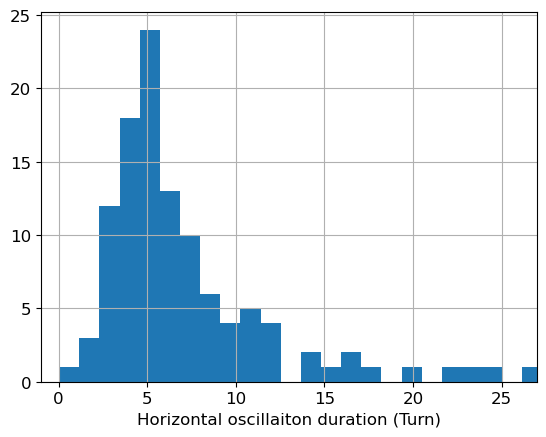

In [42]:
plt.hist(np.abs(time_111_x),bins=80)
plt.grid()
plt.xlim(-1,27)
plt.xlabel('Horizontal oscillaiton duration (Turn)')
plt.savefig('time111_x.png',dpi=100)
plt.show()

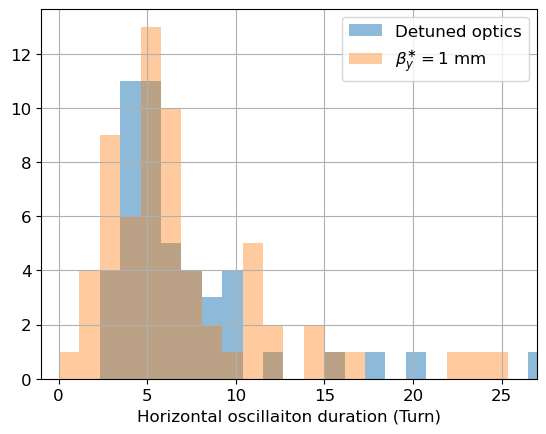

In [43]:
time_111_x=np.abs(time_111_x)
time_111_x_detuned = time_111_x[optics == 0]  # B=0のインデックスのA
time_111_x_1mm = time_111_x[optics == 1] # B=1のインデックスのA

# ヒストグラムの描画
bins = np.linspace(min(time_111_x), max(time_111_x), 80) 
plt.hist(time_111_x_detuned, bins=bins, color='tab:blue', alpha=0.5, label='Detuned optics')
plt.hist(time_111_x_1mm, bins=bins, color='tab:orange', alpha=0.4, label=r'$\beta_y^{\ast}=$1 mm')
plt.grid()
plt.legend()
plt.xlim(-1,27)
plt.xlabel('Horizontal oscillaiton duration (Turn)')
plt.savefig('time111_x_optics.png',dpi=100)
plt.show()

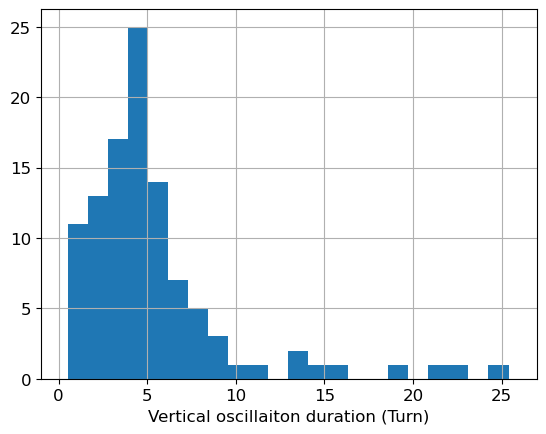

In [44]:
plt.hist(np.abs(time_111_y),bins=80)
plt.grid()
plt.xlim(-1,27)
plt.xlabel('Vertical oscillaiton duration (Turn)')
plt.savefig('time111_y.png',dpi=100)
plt.show()

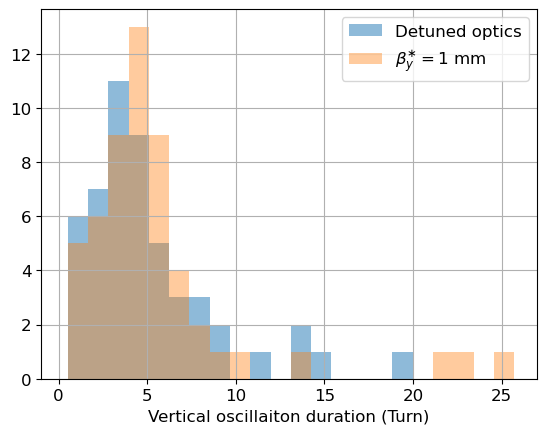

In [45]:
time_111_y=np.abs(time_111_y)
time_111_y_detuned = time_111_y[optics == 0]  # B=0のインデックスのA
time_111_y_1mm = time_111_y[optics == 1] # B=1のインデックスのA

# ヒストグラムの描画
bins = np.linspace(min(time_111_y), max(time_111_y), 80) 
plt.hist(time_111_y_detuned, bins=bins, color='tab:blue', alpha=0.5, label='Detuned optics')
plt.hist(time_111_y_1mm, bins=bins, color='tab:orange', alpha=0.4, label=r'$\beta_y^{\ast}=$1 mm')
plt.grid()
plt.legend()
plt.xlim(-1,27)
plt.xlabel('Vertical oscillaiton duration (Turn)')
plt.savefig('time111_y_optics.png',dpi=100)
plt.show()

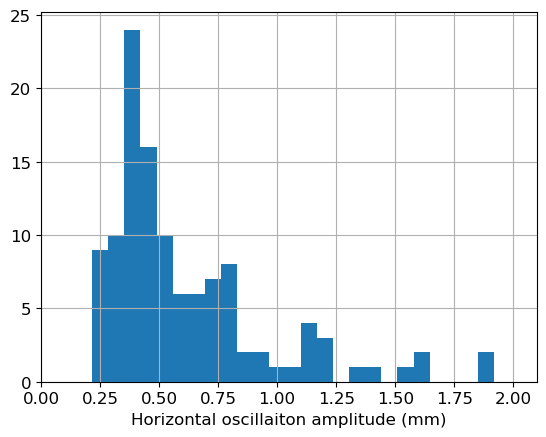

In [46]:
plt.hist(amp_111_x,bins=40)
plt.grid()
plt.xlabel('Horizontal oscillaiton amplitude (mm)')
plt.xlim(0,2.1)
plt.savefig('amp111_x.png',dpi=100)
plt.show()

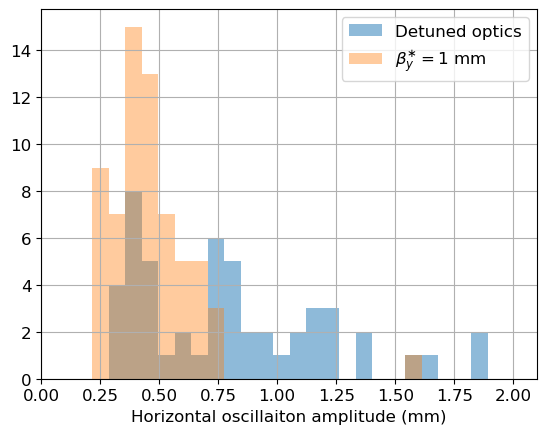

In [47]:
amp_111_x_detuned = amp_111_x[optics == 0]  # B=0のインデックスのA
amp_111_x_1mm = amp_111_x[optics == 1] # B=1のインデックスのA

# ヒストグラムの描画
bins = np.linspace(min(amp_111_x), max(amp_111_x), 40) 
plt.hist(amp_111_x_detuned, bins=bins, color='tab:blue', alpha=0.5, label='Detuned optics')
plt.hist(amp_111_x_1mm, bins=bins, color='tab:orange', alpha=0.4, label=r'$\beta_y^{\ast}=$1 mm')
plt.grid()
plt.legend()
plt.xlim(0,2.1)
plt.xlabel('Horizontal oscillaiton amplitude (mm)')
plt.savefig('amp111_x_optics.png',dpi=100)
plt.show()

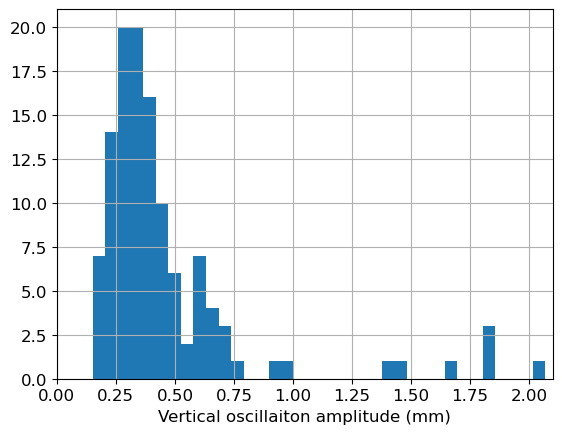

In [48]:
plt.hist(amp_111_y,bins=40)
plt.grid()
plt.xlabel('Vertical oscillaiton amplitude (mm)')
plt.xlim(0,2.1)
plt.savefig('amp111_y.png',dpi=100)
plt.show()

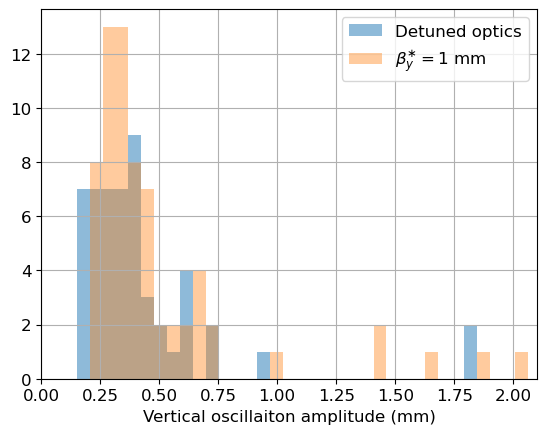

In [49]:
amp_111_y_detuned = amp_111_y[optics == 0]  # B=0のインデックスのA
amp_111_y_1mm = amp_111_y[optics == 1] # B=1のインデックスのA

# ヒストグラムの描画
bins = np.linspace(min(amp_111_y), max(amp_111_y), 40) 
plt.hist(amp_111_y_detuned, bins=bins, color='tab:blue', alpha=0.5, label='Detuned optics')
plt.hist(amp_111_y_1mm, bins=bins, color='tab:orange', alpha=0.4, label=r'$\beta_y^{\ast}=$1 mm')
plt.grid()
plt.legend()
plt.xlim(0,2.1)
plt.xlabel('Vertical oscillaiton amplitude (mm)')
plt.savefig('amp111_y_optics.png',dpi=100)
plt.show()

# only 111 with pressure burst

In [50]:
D10_L02=[]
D10_L05=[]
D10_L07=[]
D10_L08=[]
D10_L06=[]
for i in range(len(zcu111_list)):
    if pressure[i]=='D10_L02/03':
        D10_L02.append(zcu111_list[i])
    if pressure[i]=='D10_L05':
        D10_L05.append(zcu111_list[i])
    if pressure[i]=='D10_L06':
        D10_L06.append(zcu111_list[i])
    if pressure[i]=='D10_L07':
        D10_L07.append(zcu111_list[i])
    if pressure[i]=='D10_L08':
        D10_L08.append(zcu111_list[i])


In [51]:
D10_L05

['LERFUJI_2024-10-22_00-58-30.npz',
 'LERFUJI_2024-10-22_09-37-16.npz',
 'LERFUJI_2024-10-22_09-56-32.npz',
 'LERFUJI_2024-10-27_21-28-33.npz',
 'LERFUJI_2024-10-28_02-30-07.npz',
 'LERFUJI_2024-10-29_19-49-12.npz',
 'LERFUJI_2024-10-30_02-30-10.npz']

In [52]:
D10_L02_x_detuned=[]
D10_L02_y_detuned=[]
D10_L05_x_detuned=[]
D10_L05_y_detuned=[]
D10_L07_x_detuned=[]
D10_L07_y_detuned=[]
D10_L08_x_detuned=[]
D10_L08_y_detuned=[]
D10_L06_x_detuned=[]
D10_L06_y_detuned=[]

D10_L02_x_amp_detuned=[]
D10_L02_y_amp_detuned=[]
D10_L05_x_amp_detuned=[]
D10_L05_y_amp_detuned=[]
D10_L07_x_amp_detuned=[]
D10_L07_y_amp_detuned=[]
D10_L08_x_amp_detuned=[]
D10_L08_y_amp_detuned=[]
D10_L06_x_amp_detuned=[]
D10_L06_y_amp_detuned=[]

D10_L02_x_1mm=[]
D10_L02_y_1mm=[]
D10_L05_x_1mm=[]
D10_L05_y_1mm=[]
D10_L07_x_1mm=[]
D10_L07_y_1mm=[]
D10_L08_x_1mm=[]
D10_L08_y_1mm=[]
D10_L06_x_1mm=[]
D10_L06_y_1mm=[]

D10_L02_x_amp_1mm=[]
D10_L02_y_amp_1mm=[]
D10_L05_x_amp_1mm=[]
D10_L05_y_amp_1mm=[]
D10_L07_x_amp_1mm=[]
D10_L07_y_amp_1mm=[]
D10_L08_x_amp_1mm=[]
D10_L08_y_amp_1mm=[]
D10_L06_x_amp_1mm=[]
D10_L06_y_amp_1mm=[]
for i in D10_L02:
    a,b,c,d,e=make_plot(i,'D10_L02/03')
    if optics[np.where(zcu111_list==i)[0][0]]==0:
        D10_L02_x_detuned.append(a)
        D10_L02_y_detuned.append(b)
        D10_L02_x_amp_detuned.append(c)
        D10_L02_y_amp_detuned.append(d)
    if optics[np.where(zcu111_list==i)[0][0]]==1:
        D10_L02_x_1mm.append(a)
        D10_L02_y_1mm.append(b)
        D10_L02_x_amp_1mm.append(c)
        D10_L02_y_amp_1mm.append(d)
for i in D10_L05:
    a,b,c,d,e=make_plot(i,'D10_L05')
    if optics[np.where(zcu111_list==i)[0][0]]==0:
        D10_L05_x_detuned.append(a)
        D10_L05_y_detuned.append(b)
        D10_L05_x_amp_detuned.append(c)
        D10_L05_y_amp_detuned.append(d)
    if optics[np.where(zcu111_list==i)[0][0]]==1:
        D10_L05_x_1mm.append(a)
        D10_L05_y_1mm.append(b)
        D10_L05_x_amp_1mm.append(c)
        D10_L05_y_amp_1mm.append(d)
for i in D10_L06:
    a,b,c,d,e=make_plot(i,'D10_L06')
    if optics[np.where(zcu111_list==i)[0][0]]==0:
        D10_L06_x_detuned.append(a)
        D10_L06_y_detuned.append(b)
        D10_L06_x_amp_detuned.append(c)
        D10_L06_y_amp_detuned.append(d)
    if optics[np.where(zcu111_list==i)[0][0]]==1:
        D10_L06_x_1mm.append(a)
        D10_L06_y_1mm.append(b)
        D10_L06_x_amp_1mm.append(c)
        D10_L06_y_amp_1mm.append(d)
for i in D10_L07:
    a,b,c,d,e=make_plot(i,'D10_L07')
    if optics[np.where(zcu111_list==i)[0][0]]==0:
        D10_L07_x_detuned.append(a)
        D10_L07_y_detuned.append(b)
        D10_L07_x_amp_detuned.append(c)
        D10_L07_y_amp_detuned.append(d)
    if optics[np.where(zcu111_list==i)[0][0]]==1:
        D10_L07_x_1mm.append(a)
        D10_L07_y_1mm.append(b)
        D10_L07_x_amp_1mm.append(c)
        D10_L07_y_amp_1mm.append(d)
for i in D10_L08:
    a,b,c,d,e=make_plot(i,'D10_L08')
    if optics[np.where(zcu111_list==i)[0][0]]==0:
        D10_L08_x_detuned.append(a)
        D10_L08_y_detuned.append(b)
        D10_L08_x_amp_detuned.append(c)
        D10_L08_y_amp_detuned.append(d)
    if optics[np.where(zcu111_list==i)[0][0]]==1:
        D10_L08_x_1mm.append(a)
        D10_L08_y_1mm.append(b)
        D10_L08_x_amp_1mm.append(c)
        D10_L08_y_amp_1mm.append(d)

524288
-408445
-57841
-79.77421875
-11.296875
524288
-21314
-17357
-4.162695312500006
-3.389843749999997
524288
-36855
-25005
-7.198046875000003
-4.883593750000003
524288
-23498
-13107
-4.5892578125000085
-2.559765624999997
524288
-26972
-20493
-5.267773437499997
-4.0023437500000085
524288
-24014
-21017
-4.690039062500006
-4.104687499999997
524288
-100725
-67783
-19.672656250000003
-13.238671875000009
524288
-26109
0
-5.099218750000006
-90.9998046875
524288
-38517
-7474
-7.522656249999997
-1.4595703125000057
524288
-24690
-2606
-4.822070312500003
-0.5087890625
524288
-17658
-4605
-3.4486328125000085
-0.8992187500000028
524288
-24261
-22030
-4.73828125
-4.302539062500003
524288
-50833
-39746
-9.928125000000009
-7.7626953125
524288
-49996
-34691
-9.7646484375
-6.775390625
524288
-82080
-44893
-16.031054687500003
-8.767968750000009
524288
-44302
-21112
-8.652539062499997
-4.123242187499997
524288
-61843
-48406
-12.078515625000009
-9.4541015625
524288
-301629
-21987
-58.911718750000006
-4.

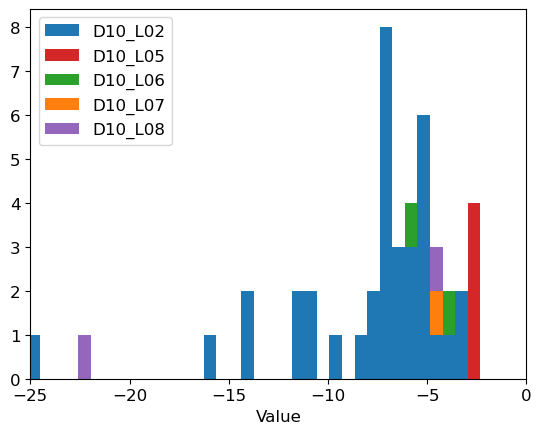

In [53]:
plt.hist([D10_L02_x_1mm,D10_L05_x_1mm,D10_L06_x_1mm,D10_L07_x_1mm,D10_L08_x_1mm], bins=140, stacked=True, 
         color=['tab:blue', 'tab:red', 'tab:green','tab:orange','tab:purple'], label=['D10_L02','D10_L05','D10_L06','D10_L07','D10_L08'])

# ラベル・凡例
plt.xlabel('Value')
plt.legend()
plt.xlim(-25,0)
plt.show()

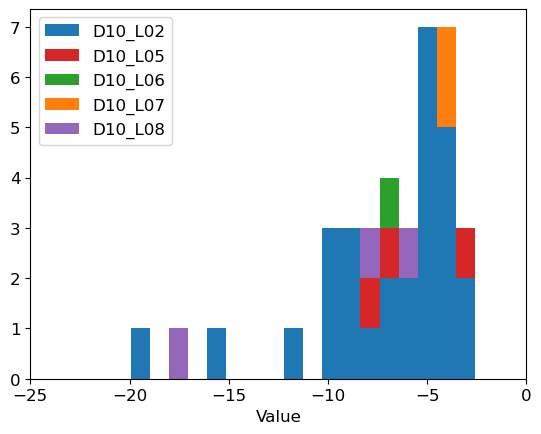

In [54]:
plt.hist([D10_L02_x_detuned,D10_L05_x_detuned,D10_L06_x_detuned,D10_L07_x_detuned,D10_L08_x_detuned], bins=80, stacked=True, 
         color=['tab:blue', 'tab:red', 'tab:green','tab:orange','tab:purple'], label=['D10_L02','D10_L05','D10_L06','D10_L07','D10_L08'])

# ラベル・凡例
plt.xlabel('Value')
plt.legend()
plt.xlim(-25,0)
plt.show()

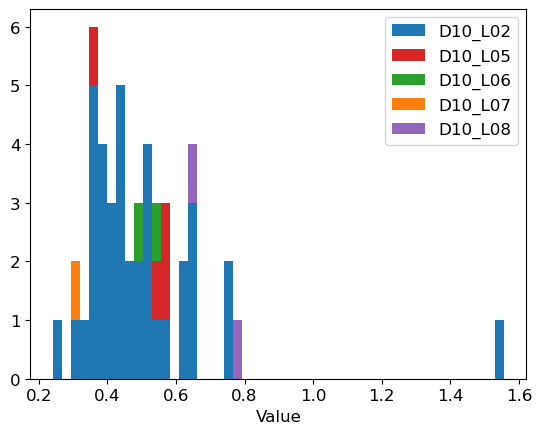

In [55]:
plt.hist([D10_L02_x_amp_1mm,D10_L05_x_amp_1mm,D10_L06_x_amp_1mm,D10_L07_x_amp_1mm,D10_L08_x_amp_1mm], bins=50, stacked=True, 
         color=['tab:blue', 'tab:red', 'tab:green','tab:orange','tab:purple'], label=['D10_L02','D10_L05','D10_L06','D10_L07','D10_L08'])

# ラベル・凡例
plt.xlabel('Value')
plt.legend()
#plt.xlim(-25,0)
plt.show()

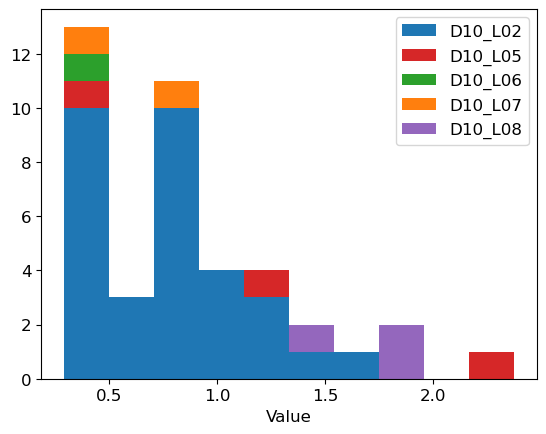

In [56]:
plt.hist([D10_L02_x_amp_detuned,D10_L05_x_amp_detuned,D10_L06_x_amp_detuned,D10_L07_x_amp_detuned,D10_L08_x_amp_detuned],  stacked=True, 
         color=['tab:blue', 'tab:red', 'tab:green','tab:orange','tab:purple'], label=['D10_L02','D10_L05','D10_L06','D10_L07','D10_L08'])

# ラベル・凡例
plt.xlabel('Value')
plt.legend()
#plt.xlim(-25,0)
plt.show()

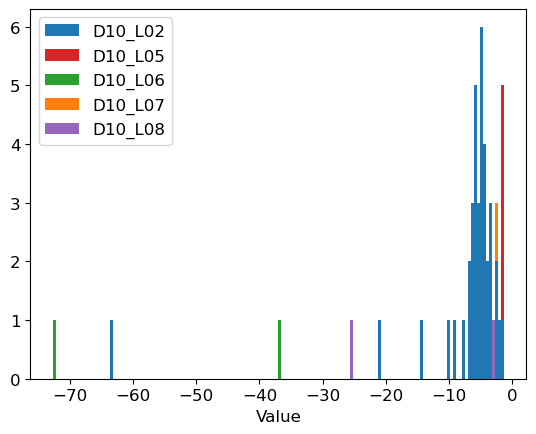

In [57]:
plt.hist([D10_L02_y_1mm,D10_L05_y_1mm,D10_L06_y_1mm,D10_L07_y_1mm,D10_L08_y_1mm], bins=150, stacked=True, 
         color=['tab:blue', 'tab:red', 'tab:green','tab:orange','tab:purple'], label=['D10_L02','D10_L05','D10_L06','D10_L07','D10_L08'])

# ラベル・凡例
plt.xlabel('Value')
plt.legend()
#plt.xlim(-15,0)
plt.show()

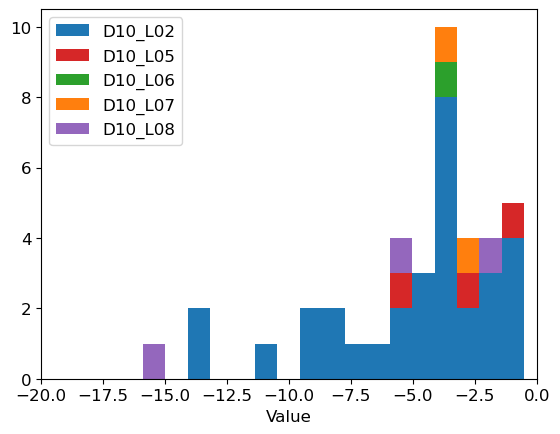

In [34]:
plt.hist([D10_L02_y_detuned,D10_L05_y_detuned,D10_L06_y_detuned,D10_L07_y_detuned,D10_L08_y_detuned], bins=100, stacked=True, 
         color=['tab:blue', 'tab:red', 'tab:green','tab:orange','tab:purple'], label=['D10_L02','D10_L05','D10_L06','D10_L07','D10_L08'])

# ラベル・凡例
plt.xlabel('Value')
plt.legend()
plt.xlim(-20,0)
plt.show()

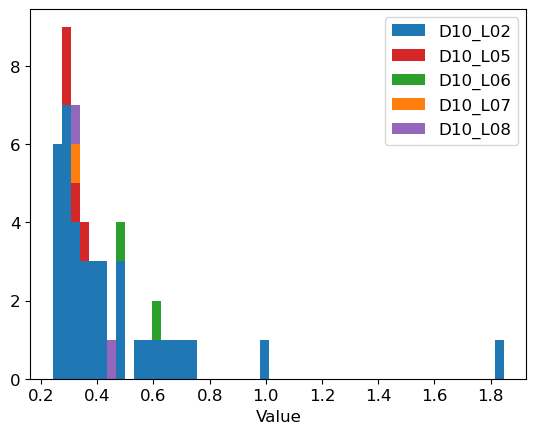

In [25]:
plt.hist([D10_L02_y_amp_1mm,D10_L05_y_amp_1mm,D10_L06_y_amp_1mm,D10_L07_y_amp_1mm,D10_L08_y_amp_1mm], bins=50, stacked=True, 
         color=['tab:blue', 'tab:red', 'tab:green','tab:orange','tab:purple'], label=['D10_L02','D10_L05','D10_L06','D10_L07','D10_L08'])

# ラベル・凡例
plt.xlabel('Value')
plt.legend()
#plt.xlim(-25,0)
plt.show()

# combined analysis

In [6]:
zcu111_list_2=zcu111_list[59:]
pressure_2=pressure[59:]

In [7]:
def get_file_timestamp(filename):
    # ファイル名からタイムスタンプを抽出
    match = re.search(r'_(\d{4}-\d{2}-\d{2}_\d{2}-\d{2}-\d{2})\.npz$', filename)
    return match.group(1) if match else None

def generate_possible_timestamps(timestamp_str):
    # 文字列のタイムスタンプをdatetimeオブジェクトに変換
    timestamp = datetime.strptime(timestamp_str, "%Y-%m-%d_%H-%M-%S")
    # -1秒, 0秒, +1秒の3つのタイムスタンプを生成
    return [
        (timestamp + timedelta(seconds=offset)).strftime("%Y-%m-%d_%H-%M-%S")
        for offset in [-1, 0, 1]
    ]

def find_matching_files_from_lists(files_dir1, dir2):
    # ディレクトリ2のファイル名をセットに変換して検索を効率化
    files_dir2 = os.listdir(dir2)
    files_dir2_set = set(files_dir2)
    matching_files = []
    pressure_burst=[]

    for i in range(len(files_dir1)):
        file1=files_dir1[i]
        timestamp_str = get_file_timestamp(file1)
        
        if timestamp_str:
            # ±1秒のタイムスタンプ候補を生成
            possible_timestamps = generate_possible_timestamps(timestamp_str)
            
            # ディレクトリ2に一致するタイムスタンプのファイルがあるか確認
            for ts in possible_timestamps:
                matching_file = next((f2 for f2 in files_dir2_set if ts in f2), None)
                if matching_file:
                    matching_files.append((file1, matching_file))
                    pressure_burst.append(pressure_2[i])
                    break  # 最初に一致したファイルのみ記録
    
    return matching_files,pressure_burst

# 使用例
files_dir1 = zcu111_list_2
dir2 = '/mnt/SBOR/2024c_RFSoC/ZCU208/Abort/'
matches,pres = find_matching_files_from_lists(files_dir1, dir2)

fuji_file = []
D5_file = []
# 結果の表示
for file1, file2 in matches:
    fuji_file.append(file1)
    D5_file.append(file2)
    print(f"Match found: {file1} in list, {file2} in dir2")

Match found: LERFUJI_2024-10-27_13-43-55.npz in list, LERD5_2024-10-27_13-43-55.npz in dir2
Match found: LERFUJI_2024-10-27_15-10-13.npz in list, LERD5_2024-10-27_15-10-13.npz in dir2
Match found: LERFUJI_2024-10-27_15-32-04.npz in list, LERD5_2024-10-27_15-32-04.npz in dir2
Match found: LERFUJI_2024-10-27_21-28-33.npz in list, LERD5_2024-10-27_21-28-33.npz in dir2
Match found: LERFUJI_2024-10-27_23-44-12.npz in list, LERD5_2024-10-27_23-44-12.npz in dir2
Match found: LERFUJI_2024-10-28_02-06-05.npz in list, LERD5_2024-10-28_02-06-05.npz in dir2
Match found: LERFUJI_2024-10-28_02-30-07.npz in list, LERD5_2024-10-28_02-30-07.npz in dir2
Match found: LERFUJI_2024-10-28_02-55-30.npz in list, LERD5_2024-10-28_02-55-30.npz in dir2
Match found: LERFUJI_2024-10-28_19-13-27.npz in list, LERD5_2024-10-28_19-13-27.npz in dir2
Match found: LERFUJI_2024-10-29_01-41-14.npz in list, LERD5_2024-10-29_01-41-14.npz in dir2
Match found: LERFUJI_2024-10-29_03-00-30.npz in list, LERD5_2024-10-29_03-00-30.

In [8]:
len(pres)

61

In [1]:
def make_spectrum(filename1,filename2,mark,pressure):
    npz_kw = np.load('/mnt/SBOR/2024c_RFSoC/ZCU111/Abort/'+filename1,allow_pickle=True)
    X_sum=npz_kw['X_sum']
    X_delta=npz_kw['X_delta']
    Y_sum=npz_kw['Y_sum']
    Y_delta=npz_kw['Y_delta']

    
    if filename1=="LERFUJI_2024-10-16_08-57-48.npz" or filename1=="LERFUJI_2024-10-16_02-27-58.npz":
        return np.nan,np.nan,np.nan,np.nan
    if filename1=="LERFUJI_2024-10-15_19-08-53.npz":
        return np.nan,np.nan,np.nan,np.nan
    if filename1=="LERFUJI_2024-10-16_01-58-36.npz":
        Y_sum=np.zeros(len(Y_delta))

    timesteps2=np.arange(len(X_sum))/509
    timesteps2=timesteps2-timesteps2[-1]
    
    ##################    



    df = pd.DataFrame({'x':timesteps2,'X_sum':X_sum,'X_delta':X_delta,'Y_sum':Y_sum,'Y_delta':Y_delta})
    threshold=2000
    # 条件に従って 'result' を計算
    df['result_x'] = np.where(df['X_sum'] > threshold, df['X_delta'] / df['X_sum']*(16.58/5), 0)
    # 'result' から オフセットの値を引き算
    df['result_diff_x'] = df['result_x'] 
    offset = df['result_x'].iloc[0:5120].reset_index(drop=True)  # 1行目から5120行目の値
    for i in range(1, len(df) // 5120):
        start = i * 5120
        end = start + 5120-1
        df.loc[start:end, 'result_diff_x'] -= offset.values
    # 絶対値が 0.4 を超える場合は 0 に設定
    df['result_diff_x'] = np.where(abs(df['result_diff_x']) > 0.7, 0, df['result_diff_x'])
    # 'X_sum' が 2000 より小さい行の 'result' を NaN にする
    df['result_diff_x'] = np.where(df['X_sum'] <= threshold, np.nan, df['result_diff_x'])
    moving_avg = df['result_diff_x'].dropna().rolling(window=500).mean()
    moving_std = df['result_diff_x'].dropna().rolling(window=500).std()
    # 元のDataFrameに移動平均をマージ
    df['x_moving_avg'] = moving_avg.reindex(df.index)
    df['x_moving_std'] = moving_std.reindex(df.index)
    df['result_diff_x'] = np.where(df['X_sum'] <= threshold, 0, df['result_diff_x'])
    df['result_interp_x']=df['result_diff_x']#.interpolate(method='spline',order=1)

    df['result_y'] = np.where(df['X_sum'] > threshold, df['Y_delta'] / df['Y_sum']*(16.58/5), 0)
    # 'result' から 51200 行上の値を引き算
    df['result_diff_y'] = df['result_y']
    offset = df['result_y'].iloc[0:5120].reset_index(drop=True)  # 1行目から5120行目の値
    for i in range(1, len(df) // 5120):
        start = i * 5120
        end = start + 5120-1
        df.loc[start:end, 'result_diff_y'] -= offset.values
    # 絶対値が 0.4 を超える場合は 0 に設定
    df['result_diff_y'] = np.where(abs(df['result_diff_y']) > 0.7, 0, df['result_diff_y'])
    # 'X_sum' が 2000 より小さい行の 'result' を NaN にする
    df['result_diff_y'] = np.where(df['X_sum'] <= threshold, np.nan, df['result_diff_y'])
    moving_avg = df['result_diff_y'].dropna().rolling(window=500).mean()
    moving_std = df['result_diff_y'].dropna().rolling(window=500).std()
    # 元のDataFrameに移動平均をマージ
    df['y_moving_avg'] = moving_avg.reindex(df.index)
    df['y_moving_std'] = moving_std.reindex(df.index)
    df['result_diff_y'] = np.where(df['X_sum'] <= threshold, 0, df['result_diff_y'])
    df['result_interp_y']=df['result_diff_y']#.interpolate(method='spline',order=1)

    # 条件に従って 'result' を計算
    df['result_charge'] = np.where(df['X_sum'] > threshold,  df['X_sum']+df['Y_sum'], np.nan)
    # 'result' から 51200 行上の値を引き算
    df['result_diff_charge'] = df['result_charge'] / df['result_charge'].shift(51200)

    condition = df['X_sum'] <= 2000
    # 連続する2000以下の行数をカウント
    df['group'] = (condition != condition.shift()).cumsum()
    df['count'] = df.groupby('group')['X_sum'].transform('size')
    # 2000以下の連続が300行以上になる部分を削除
    index_to_drop = df[(condition) & (df['count'] >= 300)].index[0] if len(df[(condition) & (df['count'] >= 300)]) > 0 else None
    # 該当部分を削除
    if index_to_drop is not None:
        df = df[:index_to_drop]  # 連続部分の開始行以降を削除



    step_size = 40
    turn=len(df)//5120-10
    if turn<10:
        return np.nan
    tbtdata_111_x=df['result_interp_x'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_x_ma=df['x_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_x_std=df['x_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_y=df['result_interp_y'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_y_ma=df['y_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_y_std=df['y_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    charge_111=df['result_diff_charge'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    
    #tbtdata_111=tbtdata_111.reshape(turn,5120)
    turn111=turn

    a=tbtdata_111_x_ma[-80*5120:]
    b=np.full(iii*5120,np.nanstd(tbtdata_111_x))*0.6
    index_111 = next(
            (i for i, (a_val, b_val) in enumerate(zip(a, b))
             if not np.isnan(a_val) and not np.isnan(b_val) and abs(a_val) > b_val),
            80*5120
        )
    index_111=index_111-80*5120
    print(index_111)
    a=tbtdata_111_y_ma[-80*5120:]
    b=np.full(iii*5120,np.nanstd(tbtdata_111_y))*0.6
    index_111_y = next(
            (i for i, (a_val, b_val) in enumerate(zip(a, b))
             if not np.isnan(a_val) and not np.isnan(b_val) and abs(a_val) > b_val),
            80*5120
        )
    index_111_y=index_111_y-80*5120
    print(index_111_y)


    #######################################
    #
    #               ZCU208
    #
    ########################################
    npz_kw = np.load('/mnt/SBOR/2024c_RFSoC/ZCU208/Abort/'+filename2,allow_pickle=True)
    AC_sum=npz_kw['AC_sum']
    AC_delta=npz_kw['AC_delta']
    BD_sum=npz_kw['BD_sum']
    BD_delta=npz_kw['BD_delta']

    
    timesteps2=np.arange(len(AC_sum))/5120
    timesteps2=timesteps2-timesteps2[-1]

    ##################    


    df = pd.DataFrame({'x':timesteps2,'AC_sum':AC_sum,'AC_delta':AC_delta,'BD_sum':BD_sum,'BD_delta':BD_delta})
    threshold=500
    # 条件に従って 'result' を計算
    df['result_AC'] = np.where(df['AC_sum'] > threshold, df['AC_delta'] / df['AC_sum']*(16.58/5), 0)
    # 'result' から 51200 行上の値を引き算
    df['result_diff_AC'] = df['result_AC']
    offset = df['result_AC'].iloc[0:5120].reset_index(drop=True)  # 1行目から5120行目の値
    for i in range(1, len(df) // 5120):
        start = i * 5120
        end = start + 5120-1
        df.loc[start:end, 'result_diff_AC'] -= offset.values
    # 絶対値が 0.4 を超える場合は 0 に設定
    df['result_diff_AC'] = np.where(abs(df['result_diff_AC']) > 0.7, 0, df['result_diff_AC'])
    # 'X_sum' が 2000 より小さい行の 'result' を NaN にする
    df['result_diff_AC'] = np.where(df['AC_sum'] <= threshold, np.nan, df['result_diff_AC'])
    moving_avg = df['result_diff_AC'].dropna().rolling(window=500).mean()
    moving_std = df['result_diff_AC'].dropna().rolling(window=500).std()
    # 元のDataFrameに移動平均をマージ
    df['AC_moving_avg'] = moving_avg.reindex(df.index)
    df['AC_moving_std'] = moving_std.reindex(df.index)
    df['result_diff_AC'] = np.where(df['AC_sum'] <= threshold, 0, df['result_diff_AC'])
    df['result_interp_AC']=df['result_diff_AC']#.interpolate(method='spline',order=1)

    # 条件に従って 'result' を計算
    df['result_BD'] = np.where(df['AC_sum'] > threshold, df['BD_delta'] / df['BD_sum']*(16.58/5), 0)
    # 'result' から 51200 行上の値を引き算
    df['result_diff_BD'] = df['result_BD']
    offset = df['result_BD'].iloc[0:5120].reset_index(drop=True)  # 1行目から5120行目の値
    for i in range(1, len(df) // 5120):
        start = i * 5120
        end = start + 5120-1
        df.loc[start:end, 'result_diff_BD'] -= offset.values
    # 絶対値が 0.4 を超える場合は 0 に設定
    df['result_diff_BD'] = np.where(abs(df['result_diff_BD']) > 0.7, 0, df['result_diff_BD'])
    # 'X_sum' が 2000 より小さい行の 'result' を NaN にする
    df['result_diff_BD'] = np.where(df['AC_sum'] <= threshold, np.nan, df['result_diff_BD'])
    moving_avg = df['result_diff_BD'].dropna().rolling(window=500).mean()
    moving_std = df['result_diff_BD'].dropna().rolling(window=500).std()
    # 元のDataFrameに移動平均をマージ
    df['BD_moving_avg'] = moving_avg.reindex(df.index)
    df['BD_moving_std'] = moving_std.reindex(df.index)
    df['result_diff_BD'] = np.where(df['AC_sum'] <= threshold, 0, df['result_diff_BD'])
    df['result_interp_BD']=df['result_diff_BD']#.interpolate(method='spline',order=1)

    # 条件に従って 'result' を計算
    df['result_charge'] = np.where(df['AC_sum'] > threshold,  df['AC_sum']+df['BD_sum'], np.nan)
    # 'result' から 51200 行上の値を引き算
    df['result_diff_charge'] = df['result_charge'] / df['result_charge'].shift(51200)
    
    df['result_diff_x']=(df['result_interp_AC']+df['result_interp_BD'])/np.sqrt(2)
    # 'X_sum' が 2000 より小さい行の 'result' を NaN にする
    df['result_diff_x'] = np.where(df['AC_sum'] <= threshold, np.nan, df['result_diff_x'])
    moving_avg = df['result_diff_x'].dropna().rolling(window=500).mean()
    moving_std = df['result_diff_x'].dropna().rolling(window=500).std()
    # 元のDataFrameに移動平均をマージ
    df['x_moving_avg'] = moving_avg.reindex(df.index)
    df['x_moving_std'] = moving_std.reindex(df.index)
    df['result_diff_x'] = np.where(df['AC_sum'] <= threshold, 0, df['result_diff_x'])
    df['result_interp_x']=df['result_diff_x']#.interpolate(method='spline',order=1)
    
    df['result_diff_y']=(df['result_interp_AC']-df['result_interp_BD'])/np.sqrt(2)
    # 'X_sum' が 2000 より小さい行の 'result' を NaN にする
    df['result_diff_y'] = np.where(df['AC_sum'] <= threshold, np.nan, df['result_diff_y'])
    moving_avg = df['result_diff_y'].dropna().rolling(window=500).mean()
    moving_std = df['result_diff_y'].dropna().rolling(window=500).std()
    # 元のDataFrameに移動平均をマージ
    df['y_moving_avg'] = moving_avg.reindex(df.index)
    df['y_moving_std'] = moving_std.reindex(df.index)
    df['result_diff_y'] = np.where(df['AC_sum'] <= threshold, 0, df['result_diff_y'])
    df['result_interp_y']=df['result_diff_y']#.interpolate(method='spline',order=1)

    condition = df['AC_sum'] <= 2000
    # 連続する2000以下の行数をカウント
    df['group'] = (condition != condition.shift()).cumsum()
    df['count'] = df.groupby('group')['AC_sum'].transform('size')
    # 2000以下の連続が300行以上になる部分を削除
    index_to_drop = df[(condition) & (df['count'] >= 300)].index[0] if len(df[(condition) & (df['count'] >= 300)]) > 0 else None
    # 該当部分を削除
    if index_to_drop is not None:
        df = df[:index_to_drop]  # 連続部分の開始行以降を削除


    step_size = 40
    turn=len(df)//5120-10
    if turn<10:
        return np.nan,np.nan,np.nan,np.nan
    tbtdata_208_x=df['result_interp_x'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_208_x_ma=df['x_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_208_x_std=df['x_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_208_y=df['result_interp_y'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_208_y_ma=df['y_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_208_y_std=df['y_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    charge_208=df['result_diff_charge'].iloc[len(df)-5120*turn:len(df)-0*5120].values

    if mark==1:
        tbtdata_208_x=df['result_interp_AC'].iloc[len(df)-5120*turn:len(df)-0*5120].values
        tbtdata_208_x_ma=df['AC_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
        tbtdata_208_x_std=df['AC_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
        tbtdata_208_y=df['result_interp_BD'].iloc[len(df)-5120*turn:len(df)-0*5120].values
        tbtdata_208_y_ma=df['BD_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
        tbtdata_208_y_std=df['BD_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
        charge_208=df['result_diff_charge'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    turn208=turn

    a=tbtdata_208_x_ma[-80*5120:]
    b=np.full(iii*5120,np.nanstd(tbtdata_208_x))*0.7
    index_208 = next(
            (i for i, (a_val, b_val) in enumerate(zip(a, b))
             if not np.isnan(a_val) and not np.isnan(b_val) and abs(a_val) > b_val),
            80*5120
        )
    index_208=index_208-80*5120
    print(index_208)
    a=tbtdata_208_y_ma[-80*5120:]
    b=np.full(iii*5120,np.nanstd(tbtdata_208_y))*0.7
    index_208_y = next(
            (i for i, (a_val, b_val) in enumerate(zip(a, b))
             if not np.isnan(a_val) and not np.isnan(b_val) and abs(a_val) > b_val),
            80*5120
        )
    index_208_y=index_208_y-80*5120
    print(index_208_y)


    ##########  PLOT  ############
    fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7, 1, sharex=True,figsize=(16,14))
    timeaxis=np.arange(len(tbtdata_111_x))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax1.set_title(f'{filename1[8:-4]} / Pressure burst : {pressure}')
    ax1.scatter(timeaxis,tbtdata_111_x,c='red',s=1)
    ax1.plot(timeaxis,tbtdata_111_x_ma,'o-',c='green',markersize=0.02)
    #ax1.plot(timeaxis,tbtdata_111_x_std,'o-',c='green',markersize=1)
    time_111=timeaxis[index_111]
    ax1.vlines(time_111,-0.6,0.6)
    ax1.grid()
    ax1.set_ylim(-0.6,0.6)
    ax1.set_ylabel('Fuji X pos (mm)')
    timeaxis=np.arange(len(tbtdata_111_y))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax2.scatter(timeaxis,tbtdata_111_y,c='red',s=1)
    ax2.plot(timeaxis,tbtdata_111_y_ma,'o-',c='green',markersize=0.02)
    #ax2.plot(timeaxis,tbtdata_111_y_std,'o-',c='green',markersize=1)
    time_111_y=timeaxis[index_111_y]
    ax2.vlines(time_111_y,-0.6,0.6)
    ax2.grid()
    ax2.set_ylim(-0.6,0.6)
    #ax2.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax2.set_ylabel('Fuji Y pos (mm)')
    
    timeaxis=np.arange(len(charge_111))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax3.scatter(timeaxis,charge_111,c='blue',s=1)
    index_charge_111 = next((i for i, x in enumerate(charge_111[-5120*10:]) if x < 0.95), None)
    if index_charge_111 is None:
        print('not SBL')
        plt.close()
        return 
    index_charge_111+=5120*10
    charge_time_111=timeaxis[len(charge_111)-5120*20+index_charge_111]
    ax3.vlines(charge_time_111,0,1.2)
    ax3.grid()
    ax3.set_ylim(0,1.2)
    #ax3.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax3.set_ylabel('Fuji charge (a.u.)')

    timeaxis=np.arange(len(tbtdata_208_x))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    #ax4.set_title(f'{filename1[8:-4]}')
    ax4.scatter(timeaxis,tbtdata_208_x,c='red',s=1)
    ax4.plot(timeaxis,tbtdata_208_x_ma,'o-',c='green',markersize=0.02)
    #ax1.plot(timeaxis,tbtdata_111_x_std,'o-',c='green',markersize=1)
    time_208=timeaxis[index_208]
    ax4.vlines(time_208,-0.8,0.8)
    ax4.grid()
    ax4.set_ylim(-0.8,0.8)
    ax4.set_ylabel('D5 X pos (mm)')
    timeaxis=np.arange(len(tbtdata_208_y))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    ax5.scatter(timeaxis,tbtdata_208_y,c='red',s=1)
    ax5.plot(timeaxis,tbtdata_208_y_ma,'o-',c='green',markersize=0.02)
    #ax2.plot(timeaxis,tbtdata_111_y_std,'o-',c='green',markersize=1)
    time_208_y=timeaxis[index_208_y]
    ax5.vlines(time_208_y,-0.8,0.8)
    ax5.grid()
    ax5.set_ylim(-0.8,0.8)
    ax5.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax5.set_ylabel('D5 Y pos (mm)')

    timeaxis=np.arange(len(charge_208))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    ax6.scatter(timeaxis,charge_208,c='blue',s=1)
    index_charge_208 =next((i for i, x in enumerate(charge_208[-5120*10:]) if x < 0.97), 5120*10)
    if index_charge_208 is None:
        index
    index_charge_208+=5120*10
    charge_time_208=timeaxis[len(charge_208)-5120*20+index_charge_208]
    ax6.vlines(charge_time_208,0,1.2)
    ax6.grid()
    ax6.set_ylim(0,1.2)
    ax6.set_ylabel('D5 charge (a.u.)')
    ax6.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])

    mask = ~np.isnan(charge_111[-21*5120:-5120]) & ~np.isnan(charge_208[-20*5120:])
    result = np.zeros_like(charge_208[-20*5120:])
    result[mask] = charge_111[-21*5120:-5120][mask] - charge_208[-20*5120:][mask]
    ax7.scatter(timeaxis[-20*5120:],result,label='Fuji to D5',s=1)
    
    mask = ~np.isnan(charge_111[-20*5120:]) & ~np.isnan(charge_208[-20*5120:])
    result = np.zeros_like(charge_208[-20*5120:])
    result[mask] = charge_111[-20*5120:][mask] - charge_208[-20*5120:][mask]
    ax7.scatter(timeaxis[-20*5120:],result,label='D5 to Fuji',s=1)
    ax7.grid()
    ax7.set_ylim(0,0.3)
    plt.xlim(-15,0)
    plt.xlabel('Turn')
    plt.savefig(f'masterthesis/combined/{filename1[8:-4]}.png',dpi=100)
    plt.close()



    fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6, 1, sharex=True,figsize=(16,12))
    timeaxis=np.arange(len(tbtdata_111_x))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax1.set_title(f'{filename1[8:-4]} / Pressure burst : {pressure}')
    ax1.scatter(timeaxis,tbtdata_111_x,c='red',s=1)
    ax1.plot(timeaxis,tbtdata_111_x_ma,'o-',c='green',markersize=0.02)
    #ax1.plot(timeaxis,tbtdata_111_x_std,'o-',c='green',markersize=1)
    time_111=timeaxis[index_111]
    ax1.vlines(time_111,-0.6,0.6)
    ax1.grid()
    ax1.set_ylim(-0.6,0.6)
    ax1.set_ylabel('Fuji X pos (mm)')
    timeaxis=np.arange(len(tbtdata_111_y))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax2.scatter(timeaxis,tbtdata_111_y,c='red',s=1)
    ax2.plot(timeaxis,tbtdata_111_y_ma,'o-',c='green',markersize=0.02)
    #ax2.plot(timeaxis,tbtdata_111_y_std,'o-',c='green',markersize=1)
    time_111_y=timeaxis[index_111_y]
    ax2.vlines(time_111_y,-0.6,0.6)
    ax2.grid()
    ax2.set_ylim(-0.6,0.6)
    #ax2.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax2.set_ylabel('Fuji Y pos (mm)')
    
    timeaxis=np.arange(len(charge_111))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax3.scatter(timeaxis,charge_111,c='blue',s=1)
    index_charge_111 = next((i for i, x in enumerate(charge_111[-5120*10:]) if x < 0.95), None)
    if index_charge_111 is None:
        print('not SBL')
        plt.close()
        return 
    index_charge_111+=5120*10
    charge_time_111=timeaxis[len(charge_111)-5120*20+index_charge_111]
    ax3.vlines(charge_time_111,0,1.2)
    ax3.grid()
    ax3.set_ylim(0,1.2)
    #ax3.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax3.set_ylabel('Fuji charge (a.u.)')

    timeaxis=np.arange(len(tbtdata_208_x))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    #ax4.set_title(f'{filename1[8:-4]}')
    ax4.scatter(timeaxis,tbtdata_208_x,c='red',s=1)
    ax4.plot(timeaxis,tbtdata_208_x_ma,'o-',c='green',markersize=0.02)
    #ax1.plot(timeaxis,tbtdata_111_x_std,'o-',c='green',markersize=1)
    time_208=timeaxis[index_208]
    ax4.vlines(time_208,-0.8,0.8)
    ax4.grid()
    ax4.set_ylim(-0.8,0.8)
    ax4.set_ylabel('D5 X pos (mm)')
    timeaxis=np.arange(len(tbtdata_208_y))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    ax5.scatter(timeaxis,tbtdata_208_y,c='red',s=1)
    ax5.plot(timeaxis,tbtdata_208_y_ma,'o-',c='green',markersize=0.02)
    #ax2.plot(timeaxis,tbtdata_111_y_std,'o-',c='green',markersize=1)
    time_208_y=timeaxis[index_208_y]
    ax5.vlines(time_208_y,-0.8,0.8)
    ax5.grid()
    ax5.set_ylim(-0.8,0.8)
    #ax5.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax5.set_ylabel('D5 Y pos (mm)')

    timeaxis=np.arange(len(charge_208))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    ax6.scatter(timeaxis,charge_208,c='blue',s=1)
    index_charge_208 =next((i for i, x in enumerate(charge_208[-5120*10:]) if x < 0.97), 5120*10)
    if index_charge_208 is None:
        index
    index_charge_208+=5120*10
    charge_time_208=timeaxis[len(charge_208)-5120*20+index_charge_208]
    ax6.vlines(charge_time_208,0,1.2)
    ax6.grid()
    ax6.set_ylim(0,1.2)
    ax6.set_ylabel('D5 charge (a.u.)')
    #ax6.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    
    plt.xlim(-80,0)
    plt.xlabel('Turn')
    plt.savefig(f'masterthesis/combined/{filename1[8:-4]}_2.png',dpi=100)
    plt.close()

    fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6, 1, sharex=True,figsize=(16,12))
    timeaxis=np.arange(len(tbtdata_111_x))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax1.set_title(f'{filename1[8:-4]} / Pressure burst : {pressure}')
    ax1.scatter(timeaxis,tbtdata_111_x,c='red',s=1)
    ax1.plot(timeaxis,tbtdata_111_x_ma,'o-',c='green',markersize=0.02)
    #ax1.plot(timeaxis,tbtdata_111_x_std,'o-',c='green',markersize=1)
    time_111=timeaxis[index_111]
    ax1.vlines(time_111,-0.6,0.6)
    ax1.grid()
    ax1.set_ylim(-0.6,0.6)
    ax1.set_ylabel('Fuji X pos (mm)')
    timeaxis=np.arange(len(tbtdata_111_y))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax2.scatter(timeaxis,tbtdata_111_y,c='red',s=1)
    ax2.plot(timeaxis,tbtdata_111_y_ma,'o-',c='green',markersize=0.02)
    #ax2.plot(timeaxis,tbtdata_111_y_std,'o-',c='green',markersize=1)
    time_111_y=timeaxis[index_111_y]
    ax2.vlines(time_111_y,-0.6,0.6)
    ax2.grid()
    ax2.set_ylim(-0.6,0.6)
    #ax2.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax2.set_ylabel('Fuji Y pos (mm)')
    
    timeaxis=np.arange(len(charge_111))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax3.scatter(timeaxis,charge_111,c='blue',s=1)
    index_charge_111 = next((i for i, x in enumerate(charge_111[-5120*10:]) if x < 0.95), None)
    if index_charge_111 is None:
        print('not SBL')
        plt.close()
        return 
    index_charge_111+=5120*10
    charge_time_111=timeaxis[len(charge_111)-5120*20+index_charge_111]
    ax3.vlines(charge_time_111,0,1.2)
    ax3.grid()
    ax3.set_ylim(0,1.2)
    #ax3.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax3.set_ylabel('Fuji charge (a.u.)')

    timeaxis=np.arange(len(tbtdata_208_x))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    #ax4.set_title(f'{filename1[8:-4]}')
    ax4.scatter(timeaxis,tbtdata_208_x,c='red',s=1)
    ax4.plot(timeaxis,tbtdata_208_x_ma,'o-',c='green',markersize=0.02)
    #ax1.plot(timeaxis,tbtdata_111_x_std,'o-',c='green',markersize=1)
    time_208=timeaxis[index_208]
    ax4.vlines(time_208,-0.8,0.8)
    ax4.grid()
    ax4.set_ylim(-0.8,0.8)
    ax4.set_ylabel('D5 X pos (mm)')
    timeaxis=np.arange(len(tbtdata_208_y))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    ax5.scatter(timeaxis,tbtdata_208_y,c='red',s=1)
    ax5.plot(timeaxis,tbtdata_208_y_ma,'o-',c='green',markersize=0.02)
    #ax2.plot(timeaxis,tbtdata_111_y_std,'o-',c='green',markersize=1)
    time_208_y=timeaxis[index_208_y]
    ax5.vlines(time_208_y,-0.8,0.8)
    ax5.grid()
    ax5.set_ylim(-0.8,0.8)
    #ax5.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax5.set_ylabel('D5 Y pos (mm)')

    timeaxis=np.arange(len(charge_208))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    ax6.scatter(timeaxis,charge_208,c='blue',s=1)
    index_charge_208 =next((i for i, x in enumerate(charge_208[-5120*10:]) if x < 0.97), 5120*10)
    if index_charge_208 is None:
        index
    index_charge_208+=5120*10
    charge_time_208=timeaxis[len(charge_208)-5120*20+index_charge_208]
    ax6.vlines(charge_time_208,0,1.2)
    ax6.grid()
    ax6.set_ylim(0,1.2)
    ax6.set_ylabel('D5 charge (a.u.)')
    #ax6.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    
    plt.xlim(-30,0)
    plt.xlabel('Turn')
    plt.savefig(f'masterthesis/combined/{filename1[8:-4]}_3.png',dpi=100)
    plt.close()

    #######################################################
    num_plots=9
    fig, axs = plt.subplots(3, 3, figsize=(12, 10))
    for i in range(num_plots):
        ch=1-charge_111[-5120:-1]
        x=tbtdata_111_x[-5120*(10-i):-5120*(9-i)-1]
        y=tbtdata_208_x[-5120*(9-i):-5120*(8-i)-1]
        valid_mask = ~np.isnan(x) & ~np.isnan(y)  # 両方が有効なインデックスを取得
        x_valid = x[valid_mask]
        y_valid = y[valid_mask]
        ch_valid=ch[valid_mask]
        sort_indices = np.argsort(ch_valid)
        x_sorted = x_valid[sort_indices]
        y_sorted = y_valid[sort_indices]
        ch_sorted = ch_valid[sort_indices]
        # プロットの行と列のインデックス
        row = i // 3
        col = i % 3
        # 散布図を描画
        scatter=axs[row, col].scatter(x_sorted,y_sorted,c=ch_sorted,s=1,cmap='cividis_r')
        axs[row, col].set_title(f"Plot {9-i}")
        axs[row, col].set_xlabel(f"Fuji X pos")
        axs[row, col].set_ylabel(f"D5 X pos")
        axs[row, col].set_xlim(-0.4,0.4)
        axs[row, col].set_ylim(-0.4,0.4)
        axs[row, col].grid()
        #x___ = np.linspace(-0.3, 0.3, 10)  # -10から10までを100点で分割
        #y___ = 2 * x___
        #axs[row,col].plot(x___,y___,c='red',linewidth=0.5)
        cbar = fig.colorbar(scatter, ax=axs[row, col], orientation="vertical", shrink=0.9)
        #cbar.set_label("Charge Difference")
    # 全体のレイアウト調整
    plt.tight_layout()
    plt.savefig(f'masterthesis/combined/{filename1[8:-4]}_4.png',dpi=100)
    plt.close()

    num_plots=9
    fig, axs = plt.subplots(3, 3, figsize=(12, 10))
    for i in range(num_plots):
        ch=1-charge_111[-5120:-1]
        x=tbtdata_111_y[-5120*(10-i):-5120*(9-i)-1]
        y=tbtdata_208_y[-5120*(9-i):-5120*(8-i)-1]
        valid_mask = ~np.isnan(x) & ~np.isnan(y)  # 両方が有効なインデックスを取得
        x_valid = x[valid_mask]
        y_valid = y[valid_mask]
        ch_valid=ch[valid_mask]
        sort_indices = np.argsort(ch_valid)
        x_sorted = x_valid[sort_indices]
        y_sorted = y_valid[sort_indices]
        ch_sorted = ch_valid[sort_indices]
        # プロットの行と列のインデックス
        row = i // 3
        col = i % 3
        # 散布図を描画
        scatter=axs[row, col].scatter(x_sorted,y_sorted,c=ch_sorted,s=1,cmap='cividis_r')
        axs[row, col].set_title(f"Plot {9-i}")
        axs[row, col].set_xlabel(f"Fuji Y pos")
        axs[row, col].set_ylabel(f"D5 Y Pos")
        axs[row, col].set_xlim(-0.4,0.4)
        axs[row, col].set_ylim(-0.4,0.4)
        axs[row, col].grid()
        #x___ = np.linspace(-0.3, 0.3, 10)  # -10から10までを100点で分割
        #y___ = 2 * x___
        #axs[row,col].plot(x___,y___,c='red',linewidth=0.5)
        cbar = fig.colorbar(scatter, ax=axs[row, col], orientation="vertical", shrink=0.9)
        #cbar.set_label("Charge Difference")
    # 全体のレイアウト調整
    plt.tight_layout()
    plt.savefig(f'masterthesis/combined/{filename1[8:-4]}_3.png',dpi=100)
    plt.close()
    
    
    return time_111, time_111_y,time_208,time_208_y

In [11]:
#target_datetime = datetime(2024, 10, 27, 7, 0, 0)
time_111_x_D10L02=[]
time_111_y_D10L02=[]
time_208_x_D10L02=[]
time_208_y_D10L02=[]

time_111_x_D10L05=[]
time_111_y_D10L05=[]
time_208_x_D10L05=[]
time_208_y_D10L05=[]

time_111_x_D10L06=[]
time_111_y_D10L06=[]
time_208_x_D10L06=[]
time_208_y_D10L06=[]

time_111_x_D10L07=[]
time_111_y_D10L07=[]
time_208_x_D10L07=[]
time_208_y_D10L07=[]

time_111_x_D10L08=[]
time_111_y_D10L08=[]
time_208_x_D10L08=[]
time_208_y_D10L08=[]

time_111_x=[]
time_111_y=[]
time_208_x=[]
time_208_y=[]
for i in range(len(fuji_file)):
    print(fuji_file[i])
    print(pressure[i])
    mark=0
    if pressure[i]=='D10_L02/03':
        a,b,c,d=make_spectrum(fuji_file[i],D5_file[i],mark=mark,pressure=pres[i])
        time_111_x_D10L02.append(a)
        time_111_y_D10L02.append(b)
        time_208_x_D10L02.append(c)
        time_208_y_D10L02.append(d)
    if pressure[i]=='D10_L05':
        a,b,c,d=make_spectrum(fuji_file[i],D5_file[i],mark=mark,pressure=pres[i])
        time_111_x_D10L05.append(a)
        time_111_y_D10L05.append(b)
        time_208_x_D10L05.append(c)
        time_208_y_D10L05.append(d)
    if pressure[i]=='D10_L06':
        a,b,c,d=make_spectrum(fuji_file[i],D5_file[i],mark=mark,pressure=pres[i])
        time_111_x_D10L06.append(a)
        time_111_y_D10L06.append(b)
        time_208_x_D10L06.append(c)
        time_208_y_D10L06.append(d)
    if pressure[i]=='D10_L07':
        a,b,c,d=make_spectrum(fuji_file[i],D5_file[i],mark=mark,pressure=pres[i])
        time_111_x_D10L07.append(a)
        time_111_y_D10L07.append(b)
        time_208_x_D10L07.append(c)
        time_208_y_D10L07.append(d)
    if pressure[i]=='D10_L08':
        a,b,c,d=make_spectrum(fuji_file[i],D5_file[i],mark=mark,pressure=pres[i])
        time_111_x_D10L08.append(a)
        time_111_y_D10L08.append(b)
        time_208_x_D10L08.append(c)
        time_208_y_D10L08.append(d)
    
    a,b,c,d=make_spectrum(fuji_file[i],D5_file[i],mark=mark,pressure=pres[i])
    time_111_x.append(a)
    time_111_y.append(b)
    time_208_x.append(c)
    time_208_y.append(d)


LERFUJI_2024-10-27_13-43-55.npz
D10_L02/03
-22580
-14478
-22166
-9354
-22580
-14478
-22166
-9354
LERFUJI_2024-10-27_15-10-13.npz
D10_L02/03
-117414
-129458
-123548
-124775
-117414
-129458
-123548
-124775
LERFUJI_2024-10-27_15-32-04.npz
D04_L07
-55922
-47376
-28190
-37130
LERFUJI_2024-10-27_21-28-33.npz
D10_L02/03
-11807
-6714
-6655
-6420
-11807
-6714
-6655
-6420
LERFUJI_2024-10-27_23-44-12.npz
D10_L02/03
-22814
-22804
-10610
-16316
-22814
-22804
-10610
-16316
LERFUJI_2024-10-28_02-06-05.npz
D10_L02/03
-31779
-30813
0
-25891
-31779
-30813
0
-25891
LERFUJI_2024-10-28_02-30-07.npz
D10_L02/03
-12606
-6683
-6491
-6685
-12606
-6683
-6491
-6685
LERFUJI_2024-10-28_02-55-30.npz
D10_L02/03
-26419
-22357
-6962
-16822
-26419
-22357
-6962
-16822
LERFUJI_2024-10-28_19-13-27.npz
D10_L02/03
-126510
-124242
-98814
-395692
-126510
-124242
-98814
-395692
LERFUJI_2024-10-29_01-41-14.npz
D10_L02/03
-18148
-11607
-1692
0
-18148
-11607
-1692
0
LERFUJI_2024-10-29_03-00-30.npz
D04_L06
-13610
-8905
-4791
-40481

In [34]:
fuji_file

['LERFUJI_2024-10-27_13-43-55.npz',
 'LERFUJI_2024-10-27_15-10-13.npz',
 'LERFUJI_2024-10-27_15-32-04.npz',
 'LERFUJI_2024-10-27_21-28-33.npz',
 'LERFUJI_2024-10-27_23-44-12.npz',
 'LERFUJI_2024-10-28_02-06-05.npz',
 'LERFUJI_2024-10-28_02-30-07.npz',
 'LERFUJI_2024-10-28_02-55-30.npz',
 'LERFUJI_2024-10-28_19-13-27.npz',
 'LERFUJI_2024-10-29_01-41-14.npz',
 'LERFUJI_2024-10-29_03-00-30.npz',
 'LERFUJI_2024-10-29_15-19-37.npz',
 'LERFUJI_2024-10-29_17-51-52.npz',
 'LERFUJI_2024-10-29_19-49-12.npz',
 'LERFUJI_2024-10-29_22-59-36.npz',
 'LERFUJI_2024-10-29_23-49-03.npz',
 'LERFUJI_2024-10-30_02-02-03.npz',
 'LERFUJI_2024-10-30_02-30-10.npz',
 'LERFUJI_2024-11-01_03-49-06.npz',
 'LERFUJI_2024-11-01_04-31-16.npz',
 'LERFUJI_2024-11-02_08-54-09.npz',
 'LERFUJI_2024-11-02_12-30-45.npz',
 'LERFUJI_2024-11-02_13-51-41.npz',
 'LERFUJI_2024-11-02_16-48-53.npz',
 'LERFUJI_2024-11-02_19-05-51.npz',
 'LERFUJI_2024-11-03_03-33-06.npz',
 'LERFUJI_2024-11-03_03-58-26.npz',
 'LERFUJI_2024-11-03_11-46-0

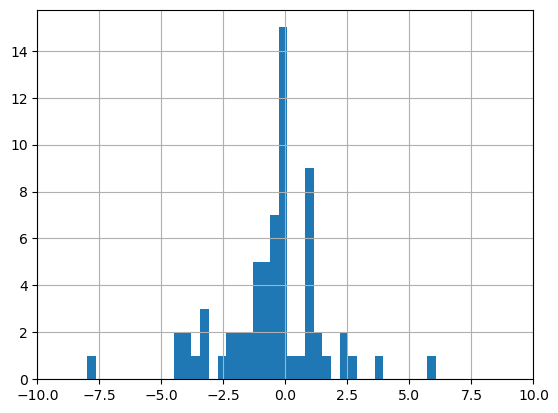

In [19]:
plt.hist(np.fmin(np.array(time_111_x),np.array(time_111_y))-np.fmin(np.array(time_208_x),np.array(time_208_y)),bins=500)
plt.grid()
plt.xlim(-10,10)
plt.show()

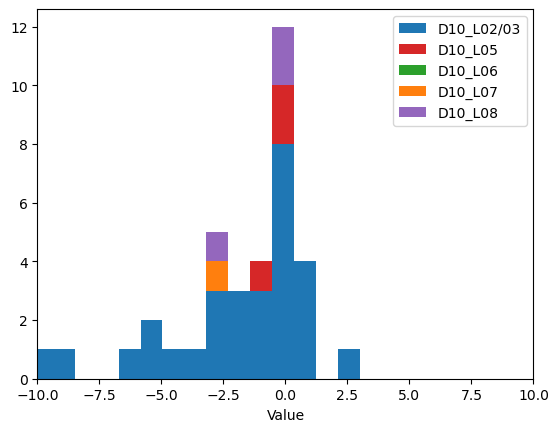

In [27]:
plt.hist([np.array(time_111_x_D10L02)-np.array(time_208_x_D10L02),
          np.array(time_111_x_D10L05)-np.array(time_208_x_D10L05),
          np.array(time_111_x_D10L06)-np.array(time_208_x_D10L06),
          np.array(time_111_x_D10L07)-np.array(time_208_x_D10L07),
          np.array(time_111_x_D10L08)-np.array(time_208_x_D10L08)], bins=200, stacked=True, 
         color=['tab:blue', 'tab:red', 'tab:green','tab:orange','tab:purple'], label=['D10_L02/03','D10_L05','D10_L06','D10_L07','D10_L08'])

# ラベル・凡例
plt.xlabel('Value')
plt.legend()
plt.xlim(-10,10)
plt.show()

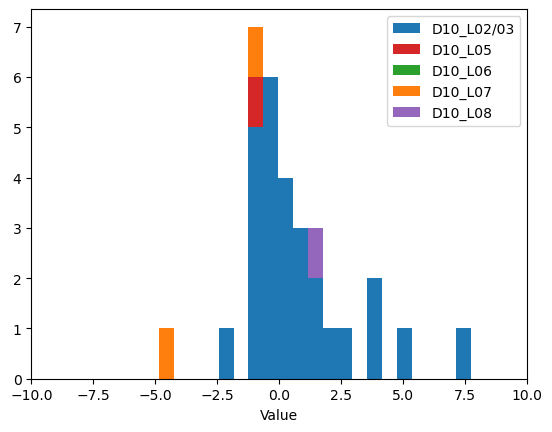

In [28]:
plt.hist([np.array(time_111_y_D10L02)-np.array(time_208_y_D10L02),
          np.array(time_111_y_D10L05)-np.array(time_208_y_D10L05),
          np.array(time_111_y_D10L06)-np.array(time_208_y_D10L06),
          np.array(time_111_y_D10L07)-np.array(time_208_y_D10L07),
          np.array(time_111_y_D10L08)-np.array(time_208_y_D10L08)], bins=300, stacked=True, 
         color=['tab:blue', 'tab:red', 'tab:green','tab:orange','tab:purple'], label=['D10_L02/03','D10_L05','D10_L06','D10_L07','D10_L08'])

# ラベル・凡例
plt.xlabel('Value')
plt.legend()
plt.xlim(-10,10)
plt.show()

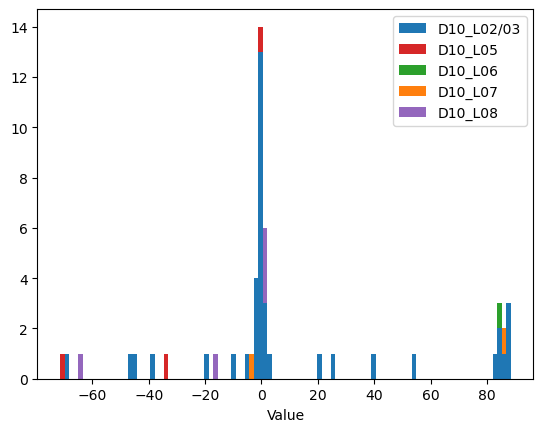

In [31]:
plt.hist([np.fmin(np.array(time_111_x_D10L02),np.array(time_111_y_D10L02))-np.fmin(np.array(time_208_x_D10L02),np.array(time_208_y_D10L02)),
          np.fmin(np.array(time_111_x_D10L05),np.array(time_111_y_D10L05))-np.fmin(np.array(time_208_x_D10L05),np.array(time_208_y_D10L05)),
          np.fmin(np.array(time_111_x_D10L06),np.array(time_111_y_D10L06))-np.fmin(np.array(time_208_x_D10L06),np.array(time_208_y_D10L06)),
          np.fmin(np.array(time_111_x_D10L07),np.array(time_111_y_D10L07))-np.fmin(np.array(time_208_x_D10L07),np.array(time_208_y_D10L07)),
          np.fmin(np.array(time_111_x_D10L08),np.array(time_111_y_D10L08))-np.fmin(np.array(time_208_x_D10L08),np.array(time_208_y_D10L08))], bins=100, stacked=True, 
         color=['tab:blue', 'tab:red', 'tab:green','tab:orange','tab:purple'], label=['D10_L02/03','D10_L05','D10_L06','D10_L07','D10_L08'])

# ラベル・凡例
plt.xlabel('Value')
plt.legend()
#plt.xlim(-10,10)
plt.show()